<a href="https://colab.research.google.com/github/paritachavda/Air-Pollution-Forecasting/blob/master/Text_preprocessing_Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link : https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

# **Data reading**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

In [5]:
dataset.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


# **Check for NA values**

In [6]:
dataset.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

# **Take releavant data**

In [7]:
dataset = dataset[['Rating', 'Reviews']]

# **Remove NA data**

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.isna().sum()

Rating     0
Reviews    0
dtype: int64

# **Label ratings**

In [10]:
def labelfun(rating):
  if rating>=4:
    return 'Positive'
  elif rating<=2:
    return 'Negative'
  else:
    return 'Neutral'

In [11]:
dataset['Label'] = dataset['Rating'].apply(labelfun)

In [12]:
dataset.head(10)

,Rating,Reviews,Label
0,5,I feel so LUCKY to have found this used (phone...,Positive
1,4,"nice phone, nice up grade from my pantach revu...",Positive
2,5,Very pleased,Positive
3,4,It works good but it goes slow sometimes but i...,Positive
4,4,Great phone to replace my lost phone. The only...,Positive
5,1,I already had a phone with problems... I know ...,Negative
6,2,The charging port was loose. I got that solder...,Negative
7,2,"Phone looks good but wouldn't stay charged, ha...",Negative
8,5,I originally was using the Samsung S2 Galaxy f...,Positive
9,3,It's battery life is great. It's very responsi...,Neutral


# **Data pre-processing**

# Remove URLs

In [13]:
import re

def removeurl(review):
  return re.sub(r'http\s+', '',review)

In [14]:
 dataset['clean_review'] = dataset['Reviews'].apply(removeurl)

# Remove punctuations and numeric values

In [15]:
def remove_non_alphanumeric(review):
  return re.sub('[^a-zA-Z]', ' ', review)

In [16]:
 dataset['clean_review'] = dataset['clean_review'].apply(remove_non_alphanumeric)

In [17]:
 dataset['clean_review'].iloc[4]

'Great phone to replace my lost phone  The only thing is the volume up button does not work  but I can still go into settings to adjust  Other than that  it does the job until I am eligible to upgrade my phone again Thaanks '

# Convert to lowercase

In [18]:
def convert_lowercase(review):
  return str(review).lower()

In [19]:
 dataset['clean_review'] = dataset['clean_review'].apply(convert_lowercase)

In [20]:
 dataset['clean_review'].iloc[4]

'great phone to replace my lost phone  the only thing is the volume up button does not work  but i can still go into settings to adjust  other than that  it does the job until i am eligible to upgrade my phone again thaanks '

# Tokenization

In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokanize(review):
  return word_tokenize(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
dataset['clean_review'] = dataset['clean_review'].apply(tokanize)

# Removing Stopwords

In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
stopwords_english = set(stopwords.words('english'))
def remove_stopwords(token):
  return [item for item in token if item not in stopwords_english]

In [28]:
dataset['clean_review'] = dataset['clean_review'].apply(remove_stopwords)

In [29]:
dataset['clean_review'].iloc[4]

['great',
 'phone',
 'replace',
 'lost',
 'phone',
 'thing',
 'volume',
 'button',
 'work',
 'still',
 'go',
 'settings',
 'adjust',
 'job',
 'eligible',
 'upgrade',
 'phone',
 'thaanks']

# Lemmatization

In [33]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma =  WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [34]:
def lemmatize(token):
  return [lemma.lemmatize(w,pos='v') for w in token]

In [35]:
dataset['clean_review'] = dataset['clean_review'].apply(lemmatize)

In [36]:
dataset['clean_review'].iloc[4]

['great',
 'phone',
 'replace',
 'lose',
 'phone',
 'thing',
 'volume',
 'button',
 'work',
 'still',
 'go',
 'settings',
 'adjust',
 'job',
 'eligible',
 'upgrade',
 'phone',
 'thaanks']

# Remove words having length<=2

In [37]:
def remove_shortwords(token):
  return [item for item in token if len(item)>2]

In [38]:
dataset['clean_review'] = dataset['clean_review'].apply(remove_shortwords)

In [39]:
dataset['clean_review'].iloc[4]

['great',
 'phone',
 'replace',
 'lose',
 'phone',
 'thing',
 'volume',
 'button',
 'work',
 'still',
 'settings',
 'adjust',
 'job',
 'eligible',
 'upgrade',
 'phone',
 'thaanks']

In [40]:
def convert_to_string(list_review):
  return ' '.join(list_review)

In [41]:
dataset['clean_review'] = dataset['clean_review'].apply(convert_to_string)

In [42]:
dataset['clean_review'].iloc[4]

'great phone replace lose phone thing volume button work still settings adjust job eligible upgrade phone thaanks'

# **Text Visualization**

In [44]:
positive_review = dataset[dataset.Label == 'Positive']['clean_review']
negative_review = dataset[dataset.Label == 'Negative']['clean_review']
neutral_review = dataset[dataset.Label == 'Neutral']['clean_review']

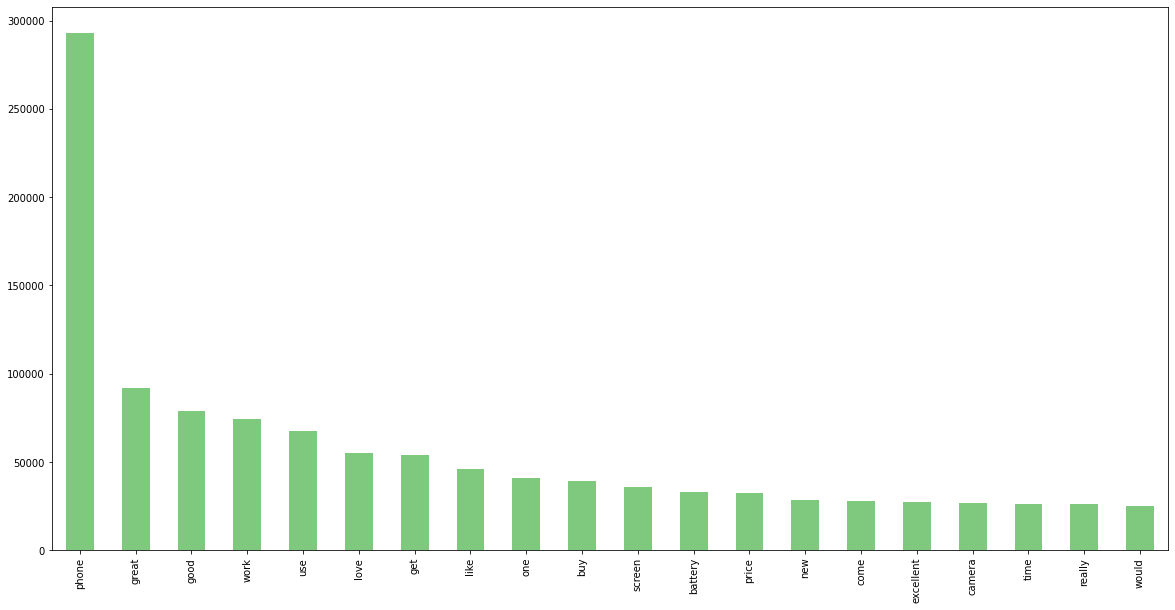

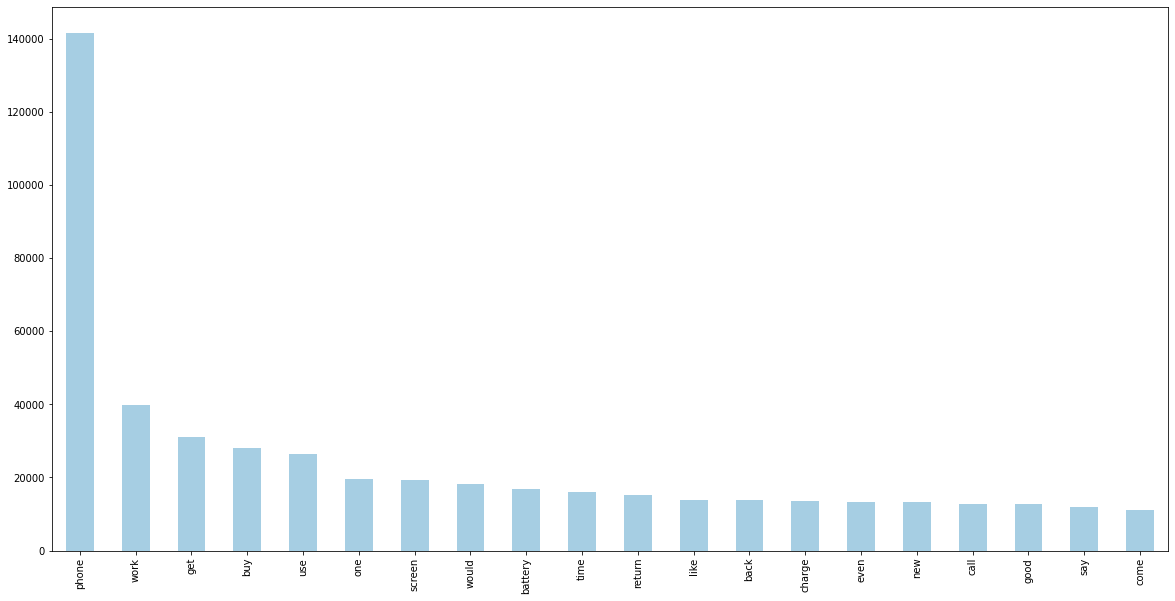

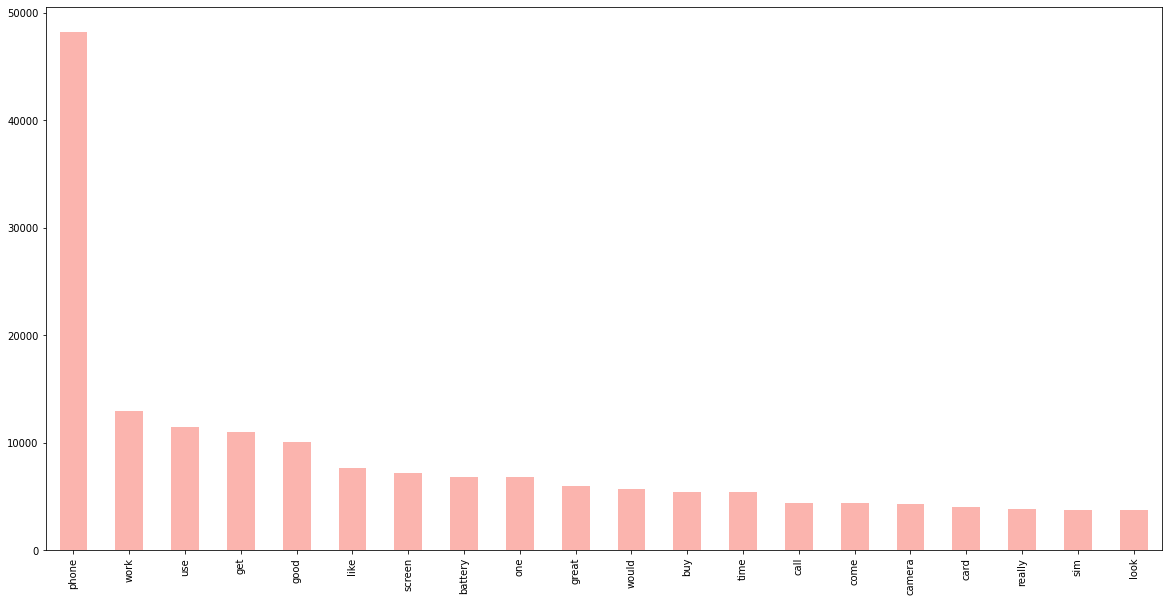

In [49]:
color = ['Accent', 'Paired', 'Pastel1']
splitedData = [positive_review, negative_review, neutral_review]

for item in range(3):
  plt.figure(figsize = (20,10))
  pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind = 'bar', colormap = color[item])
  plt.show()